# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

In [2]:
try:
    plt.style.use(["science", "notebook"])
except:
    print("Couldn't import matplotlib style correctly.")
    if input("Do you want to install SciencePlots? [y/n]") == "y":
        import subprocess
        import sys
            
        subprocess.check_call([sys.executable, "-m", "pip", "install", "SciencePlots"])
        
        print("Succesfully installed SciencePlots")
        plt.style.use(["science", "notebook"])
        
    else:
        raise ModuleNotFoundError("Please install SciencePlots.")

plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 13
plt.rcParams["legend.framealpha"] = 1

plt.rcParams["xtick.labelsize"] = 13
plt.rcParams["ytick.labelsize"] = 13

plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.grid"] = True

plt.rcParams["grid.color"] = "gray"
plt.rcParams["grid.linestyle"] = (1, (4, 9))

plt.rcParams["figure.constrained_layout.use"] = True

# Caracterización del Variac

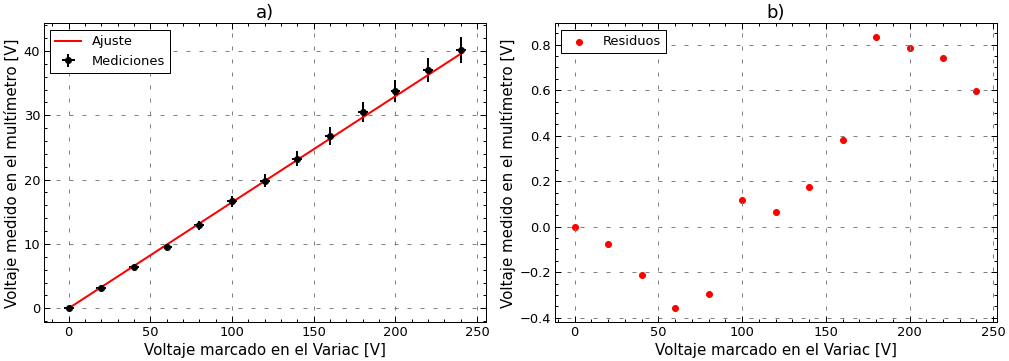

In [3]:
variac_df = pd.read_csv("meds/MedsVariac.txt", delimiter="\t")

Vin = np.array(variac_df.Vin)
Vout = np.array(variac_df.Vout)

fig, ax = plt.subplots(1, 2, figsize=(14,5))

lin = lambda x, a, b: a*x+b

x = Vin
y = Vout
xerr = np.ones_like(Vin)*3
yerr = Vout*0.05 + 0.01

popt, pcov = curve_fit(lin, x, y, absolute_sigma = True, sigma = yerr)

ax[0].errorbar(x, y, fmt = "o", color="black", label = "Mediciones", xerr = xerr, yerr = yerr)
ax[0].plot(x, lin(x, *popt), label = "Ajuste", color = "red")

ax[1].scatter(x, y - lin(x, *popt), color = "red", label = "Residuos")

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel("Voltaje marcado en el Variac [V]")
ax[1].set_xlabel("Voltaje marcado en el Variac [V]")

ax[0].set_ylabel("Voltaje medido en el multímetro [V]")
ax[1].set_ylabel("Voltaje medido en el multímetro [V]")

ax[0].set_title("a)")
ax[1].set_title("b)")

plt.show()

# R platino

In [5]:
from utils.calculus import PT100

poly = PT100().get_poly()
errpoly = PT100().get_errorpoly()

## Curva de ajuste

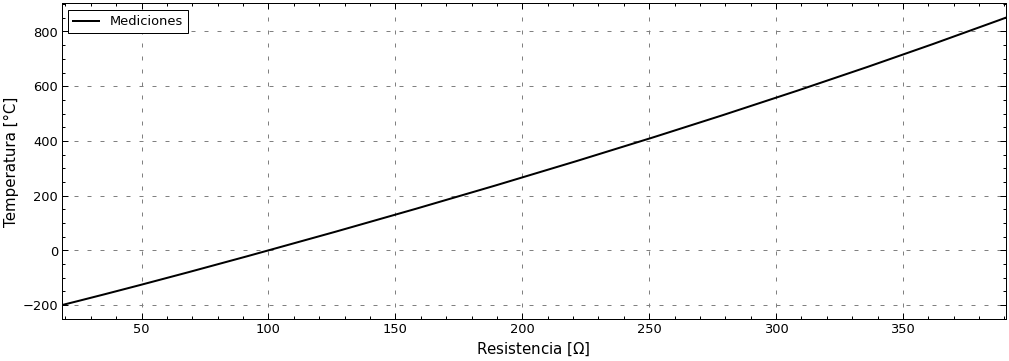

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

df_curva = pd.read_csv("files/Pt100_resistencia_temperatura.csv", header = None, names = ["T", "R"])

ax.plot(df_curva["R"], df_curva["T"], color = "black", label = "Mediciones")
ax.set_xlim(df_curva["R"].min(), df_curva["R"].max())
ax.set_xlabel("Resistencia $[\Omega]$")
ax.set_ylabel("Temperatura [°C]")
ax.legend()
plt.show()

## Mediciones de prueba

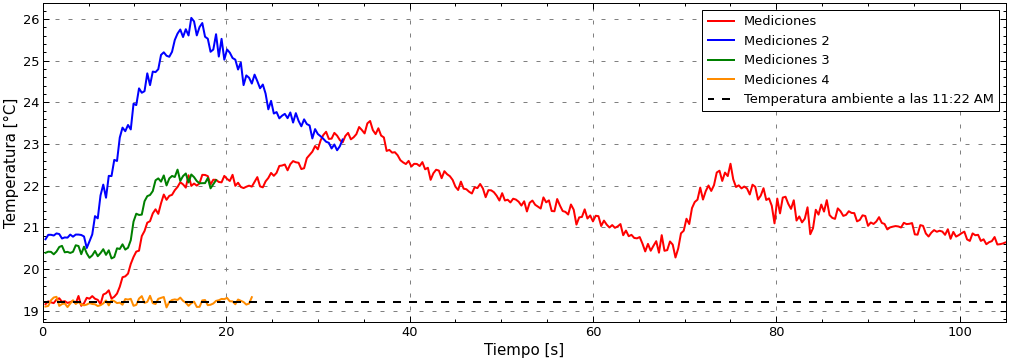

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))

#Meds 1
df_rplat = pd.read_csv("meds/calentamiento test 2022-09-14 11-10-34.csv", delimiter=",")
i = np.array(df_rplat["num_med"])
r = np.array(df_rplat["Rplat"])
ax.plot(i*0.3, poly(r), color="red", label="Mediciones") #El 0.3 es aproximado, despues guardamos bien los tiempos.

#Meds2
df_rplat = pd.read_csv("meds/Exit 2022-09-14 11-25-29.csv", delimiter=",")
i = np.array(df_rplat["num_med"])
r = np.array(df_rplat["Rplat"])
ax.plot(i*0.3, poly(r),color="blue", label="Mediciones 2") #El 0.3 es aproximado, despues guardamos bien los tiempos.

#Meds3
df_rplat = pd.read_csv("meds/X 2022-09-14 11-24-19.csv", delimiter=",")
i = np.array(df_rplat["num_med"])
r = np.array(df_rplat["Rplat"])
ax.plot(i*0.3, poly(r), color="green", label="Mediciones 3") #El 0.3 es aproximado, despues guardamos bien los tiempos.

#Meds3
df_rplat = pd.read_csv("meds/X 2022-09-14 11-22-01.csv", delimiter=",")
i = np.array(df_rplat["num_med"])
r = np.array(df_rplat["Rplat"])
ax.plot(i*0.3, poly(r), color="darkorange", label="Mediciones 4") #El 0.3 es aproximado, despues guardamos bien los tiempos.

ax.axhline(np.mean(poly(r)), color = "black", linestyle=(1, (4,4)), label = "Temperatura ambiente a las 11:22 AM")

ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Temperatura [°C]")
ax.legend()
ax.set_xlim(0, 105)

plt.show()

# Curvas de Histeresis